In [13]:
from perceptron import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import itertools


data = pd.read_table("data.txt", delimiter=',', header=None, names=['x1', 'x2', 'y'])

# Compute powers of x1 and x2 up to degree 3
for i in range(2, 4):  # Start from 2 since we already have x1 and x2
    data[f'x1_{i}'] = data['x1'] ** i
    data[f'x2_{i}'] = data['x2'] ** i

# Compute multiplication of all pairs of features
data_without_target = data.drop(columns=['y'])
feature_combinations = list(itertools.combinations(data_without_target.columns[:-1], 2))
for feature1, feature2 in feature_combinations:
    if (feature1.startswith('x1') and feature2.startswith('x2')) or (feature1.startswith('x2') and feature2.startswith('x1')):
        data_without_target[f'{feature1}*{feature2}'] = data_without_target[feature1] * data_without_target[feature2]

X = data_without_target.values
y = data['y'].values
X = np.array(X, dtype=np.float32)

y = np.array(data['y'].values, dtype=np.float32)
X = np.insert(X, 0, 1, axis=1)
# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of each set
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (3600, 13) (3600,)
Validation set: (450, 13) (450,)
Test set: (450, 13) (450,)


In [14]:
data_without_target

,x1,x2,x1_2,x2_2,x1_3,x2_3,x1*x2,x1*x2_2,x2*x1_2,x2*x1_3,x1_2*x2_2,x2_2*x1_3
0,4.780310,2.698320,22.851364,7.280931,109.236602,19.646281,12.898806,34.805106,61.660292,294.755309,166.379198,795.344145
1,-2.273710,5.750180,5.169757,33.064570,-11.754529,190.127229,-13.074242,-75.179244,29.727034,-67.590655,170.935798,-388.658433
2,-4.817170,-2.209610,23.205127,4.882376,-111.783041,-10.788148,10.644067,-23.519237,-51.274280,246.996925,113.296162,-545.766875
3,-9.526940,0.659360,90.762586,0.434756,-864.689709,0.286660,-6.281683,-4.141891,59.845219,-570.141806,39.459543,-375.928701
4,1.864400,-5.019510,3.475987,25.195481,6.480631,-126.468967,-9.358374,46.974454,-17.447753,-32.529591,87.579172,163.282609
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,-4.327500,-0.210256,18.727256,0.044208,-81.042201,-0.009295,0.909883,-0.191308,-3.937518,17.039609,0.827887,-3.582680
4496,-1.077300,1.279540,1.160575,1.637223,-1.250288,2.094892,-1.378448,-1.763780,1.485003,-1.599793,1.900120,-2.046999
4497,-2.377350,-3.078130,5.651793,9.474884,-13.436290,-29.164926,7.317792,-22.525116,-17.396954,41.358648,53.550085,-127.307294
4498,0.508152,0.432983,0.258218,0.187474,0.131214,0.081173,0.220021,0.095265,0.111804,0.056814,0.048409,0.024599


Epoch 0 Error: 0.49750000000000005
Epoch 10 Error: 0.5105555555555555
Epoch 20 Error: 0.45611111111111113
Epoch 30 Error: 0.39249999999999996
Epoch 40 Error: 0.3633333333333333
Epoch 50 Error: 0.33777777777777773
Epoch 60 Error: 0.3308333333333333
Epoch 70 Error: 0.3258333333333333
Epoch 80 Error: 0.3222222222222222
Epoch 90 Error: 0.3191666666666667
Epoch 100 Error: 0.3127777777777778
Epoch 110 Error: 0.3108333333333333
Epoch 120 Error: 0.30638888888888893
Epoch 130 Error: 0.30333333333333334
Epoch 140 Error: 0.2994444444444444
Epoch 150 Error: 0.29500000000000004
Epoch 160 Error: 0.28833333333333333


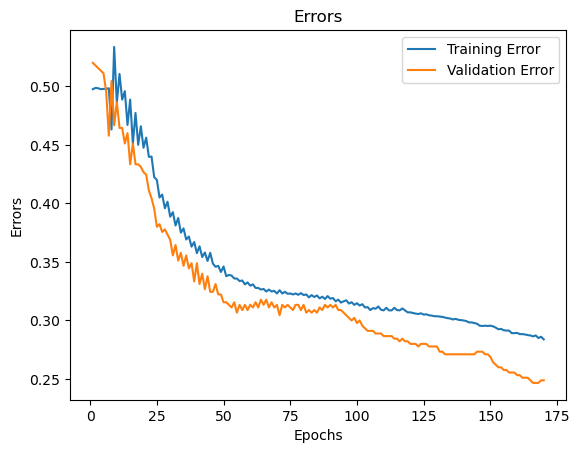

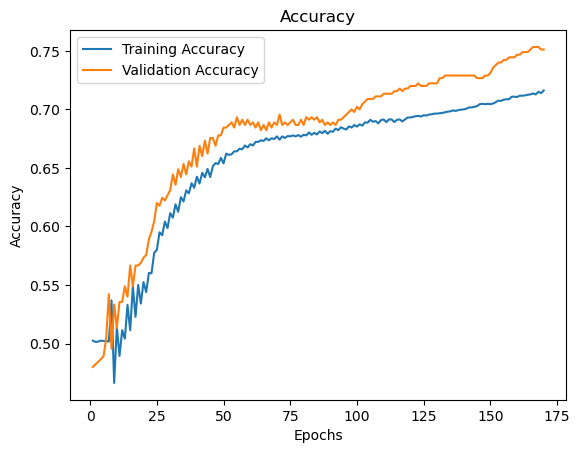


----------------------------------------------



In [31]:
perceptron = Perceptron(alpha=.0001, epochs=170)
perceptron.train(X_train, y_train, X_val, y_val)
perceptron.plot_learning_curve()
perceptron.plot_accuracy_curve()
print("\n----------------------------------------------\n")

Metrics for Training Data:

Metrics for Validation Data:

Metrics for Test Data:


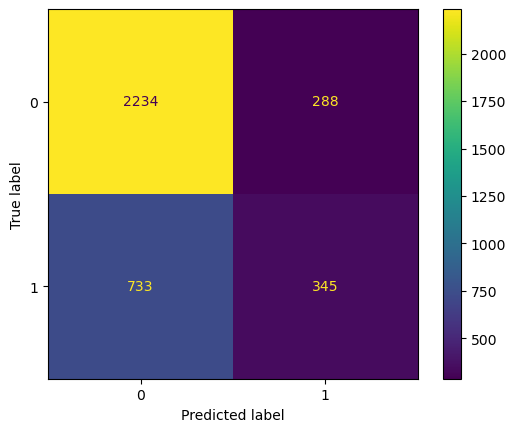

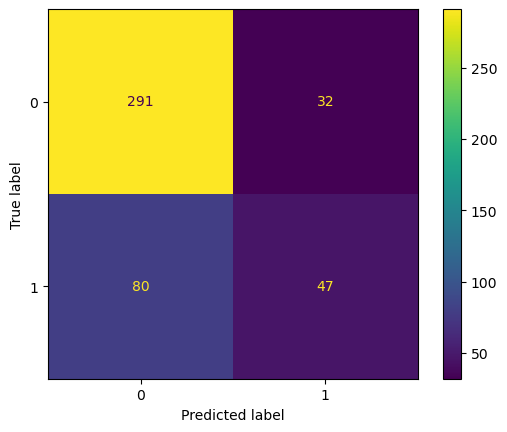

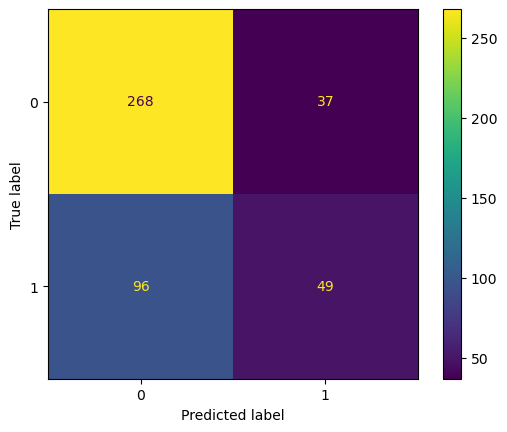

In [32]:
print("Metrics for Training Data:")
perceptron.plot_confusion_matrix(y_train, perceptron.predict(X_train))
print("\nMetrics for Validation Data:")
perceptron.plot_confusion_matrix(y_val,perceptron.predict(X_val))
print("\nMetrics for Test Data:")
perceptron.plot_confusion_matrix(y_test, perceptron.predict(X_test))

In [34]:
from sklearn.metrics import accuracy_score, f1_score
        # Calculate accuracy and F1-score
accuracy_train_score = accuracy_score(y_train, perceptron.predict(X_train))
f1_train_score = f1_score(y_train, perceptron.predict(X_train))

print(f"Accuracy for Train Data: {accuracy_train_score:.4f}")
print(f"F1-score for Train Data: {f1_train_score:.4f}")

accuracy_validation_score = accuracy_score(y_val, perceptron.predict(X_val))
f1_validation_score = f1_score(y_val, perceptron.predict(X_val))

print(f"Accuracy for Validation Data: {accuracy_validation_score:.4f}")
print(f"F1-score for Validation Data: {f1_validation_score:.4f}")

accuracy_test_score = accuracy_score(y_test, perceptron.predict(X_test))
f1_test_score = f1_score(y_test, perceptron.predict(X_test))

print(f"Accuracy for Test Data: {accuracy_test_score:.4f}")
print(f"F1-score for Test Data: {f1_test_score:.4f}")

Accuracy for Train Data: 0.7164
F1-score for Train Data: 0.4033
Accuracy for Validation Data: 0.7511
F1-score for Validation Data: 0.4563
Accuracy for Test Data: 0.7044
F1-score for Test Data: 0.4242


In [35]:
print("weights of the perceptron after training")
print("\n")
for i, weight in enumerate(perceptron.w):
    print(f"w{i} : {weight}")

weights of the perceptron after training


w0 : 0.5946940759488579
w1 : 0.98458946673593
w2 : 0.41188342795698063
w3 : 0.1696747851099382
w4 : 0.07086214179883416
w5 : 0.12432701305777609
w6 : 0.12706409439551647
w7 : 0.1609449283315463
w8 : 0.5783211297650717
w9 : 0.1694962849035778
w10 : 0.01860443368945021
w11 : -0.5013852613811048
w12 : -0.07106634380174881
